In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 

In [2]:
Vendor_Sale_Summary = pd.read_excel('Filtered_Vendor_Sale_Summary.xlsx')

In [3]:
Vendor_Sale_Summary.head(10)

,Brand,Description,VendorName,VendorNumber,Total_Purchase_Quantity,Total_Purchase_Dollar,Actual_Price_Of_Product,Actual_Purchase_Price,Volume_Per_Item (ml),Total_Sale_Price,Total_Sales_Quantiy,Total_Sales_Dollar,Total_Excise_Tax,Total_Freight_Cost,Gross_Profit,Profit_Margin,Stock_Turnover,Sale_Purchase_Ratio
0,3265,Firefly Sweet Tea Vodka,SAZERAC CO INC,8004,48651,17514.360038,0.49,0.36,50.0,1247.540024,48649,23838.010077,2552.479987,50293.619843,6323.650039,0.265276,0.999959,1.361055
1,5708,Dr McGillicuddy's Root Beer,SAZERAC CO INC,8004,66026,25089.879722,0.49,0.38,50.0,11536.470111,60074,59473.259847,3141.109961,50293.619843,34383.380125,0.578132,0.909854,2.370408
2,5683,Dr McGillicuddy's Apple Pie,SAZERAC CO INC,8004,6,2.340000,0.49,0.39,50.0,1.470000,134,65.659999,7.040000,50293.619843,63.319999,0.964362,22.333333,28.059830
3,5877,Ryans Irish Cream,SAZERAC CO INC,8004,36149,22412.380321,0.99,0.62,50.0,10284.120099,37940,37560.599988,1976.349978,50293.619843,15148.219666,0.403301,1.049545,1.675886
4,6432,Shady Fruit Real Ruby Red Gr,DIAGEO NORTH AMERICA INC,3960,4679,2994.560059,0.99,0.64,50.0,2131.470021,8009,7928.909990,63.069999,257032.069523,4934.349930,0.622324,1.711691,2.647771
5,902,Creta Olympia Red,PERFECTA WINES,10754,24,15.360000,0.99,0.64,375.0,7.920000,24,23.760000,1.340000,28720.519941,8.400000,0.353535,1.000000,1.546875
6,3369,Stolichnaya Gluten Free 80*,"STOLI GROUP,(USA) LLC",8664,1064,755.440001,0.99,0.71,50.0,8.910000,527,521.730001,27.670000,18544.490013,-233.710000,-0.447952,0.495301,0.690631
7,3904,Svedka Cucumber Lime Vodka,CONSTELLATION BRANDS INC,1392,21038,14936.979625,0.99,0.71,50.0,4736.160046,18168,17986.319980,947.349990,79528.990326,3049.340355,0.169537,0.863580,1.204147
8,7936,Bayou Spiced Rum,"STOLI GROUP,(USA) LLC",8664,16064,11405.439882,0.99,0.71,50.0,3845.160037,9943,9843.570018,514.589996,18544.490013,-1561.869864,-0.158669,0.618962,0.863059
9,3566,Pinnacle Raspberry,JIM BEAM BRANDS COMPANY,12546,20642,14655.819584,0.99,0.71,50.0,3825.360037,11128,11016.719999,577.449994,123880.969891,-3639.099585,-0.330325,0.539095,0.751696


In [4]:
Vendor_Sale_Summary.describe().T

,count,mean,std,min,25%,50%,75%,max
Brand,10692.0,18039.228769,12662.187074,58.000000,5793.500000,18761.500000,25514.250000,9.063100e+04
VendorNumber,10692.0,10650.649458,18753.519148,2.000000,3951.000000,7153.000000,9552.000000,2.013590e+05
Total_Purchase_Quantity,10692.0,3140.886831,11095.086769,1.000000,36.000000,262.000000,1975.750000,3.376600e+05
Total_Purchase_Dollar,10692.0,30106.693354,123067.799573,0.710000,453.457510,3655.464971,20738.244730,3.811252e+06
Actual_Price_Of_Product,10692.0,35.643671,148.246016,0.490000,10.990000,15.990000,28.990000,7.499990e+03
Actual_Purchase_Price,10692.0,24.385303,109.269375,0.360000,6.840000,10.455000,19.482500,5.681810e+03
Volume_Per_Item (ml),10692.0,847.360550,664.309212,50.000000,750.000000,750.000000,750.000000,2.000000e+04
Total_Sale_Price,10692.0,18793.783517,44952.773491,0.000000,289.709993,2857.799950,16059.562242,6.728193e+05
Total_Sales_Quantiy,10692.0,3077.482136,10952.851391,0.000000,33.000000,261.000000,1929.250000,3.349390e+05
Total_Sales_Dollar,10692.0,42239.074317,167655.266047,0.000000,729.219982,5298.044970,28396.914894,5.101920e+06


In [5]:
Vendor_Sale_Summary['Total_Purchase_Dollar'].max()

3811251.598571777

In [6]:
Vendor_Sale_Summary.dtypes

Brand                        int64
Description                 object
VendorName                  object
VendorNumber                 int64
Total_Purchase_Quantity      int64
Total_Purchase_Dollar      float64
Actual_Price_Of_Product    float64
Actual_Purchase_Price      float64
Volume_Per_Item (ml)       float64
Total_Sale_Price           float64
Total_Sales_Quantiy          int64
Total_Sales_Dollar         float64
Total_Excise_Tax           float64
Total_Freight_Cost         float64
Gross_Profit               float64
Profit_Margin              float64
Stock_Turnover             float64
Sale_Purchase_Ratio        float64
dtype: object

In [7]:
Vendor_Sale_Summary.shape

(10692, 18)

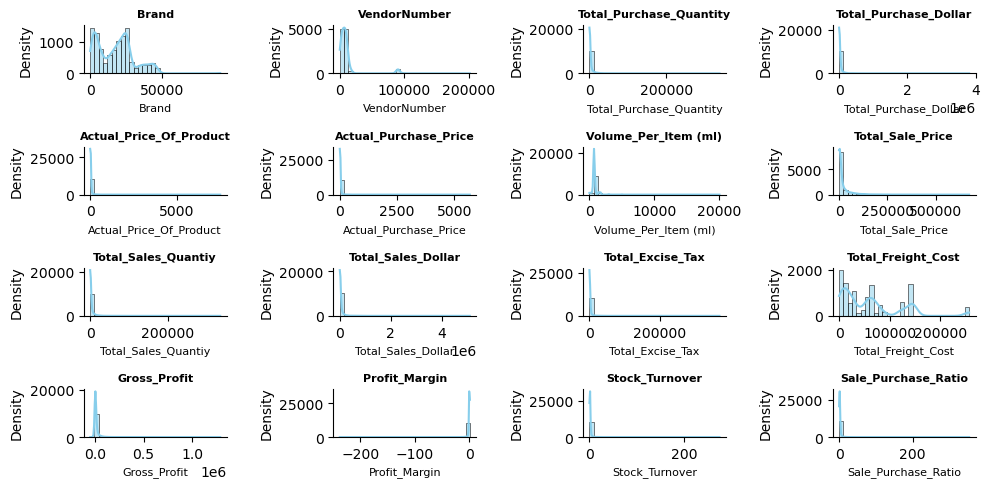

In [8]:
Num_Columns = Vendor_Sale_Summary.select_dtypes(include=['int64','float64']).columns
Col = 4
N_Col = len(Num_Columns)
Rows = math.ceil(N_Col/Col)

fig ,axes = plt.subplots(Rows, Col, figsize = (10,5))

axes = axes.flatten()

for i,features in enumerate(Num_Columns):
    sns.histplot(
        data=Vendor_Sale_Summary,
        x=features,
        ax = axes[i],
        bins=30,
        color='skyblue',
        kde=True
        )
    axes[i].set_title(features,fontsize = 8,fontweight='bold')
    axes[i].set_xlabel(features,fontsize=8)
    axes[i].set_ylabel('Density')
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

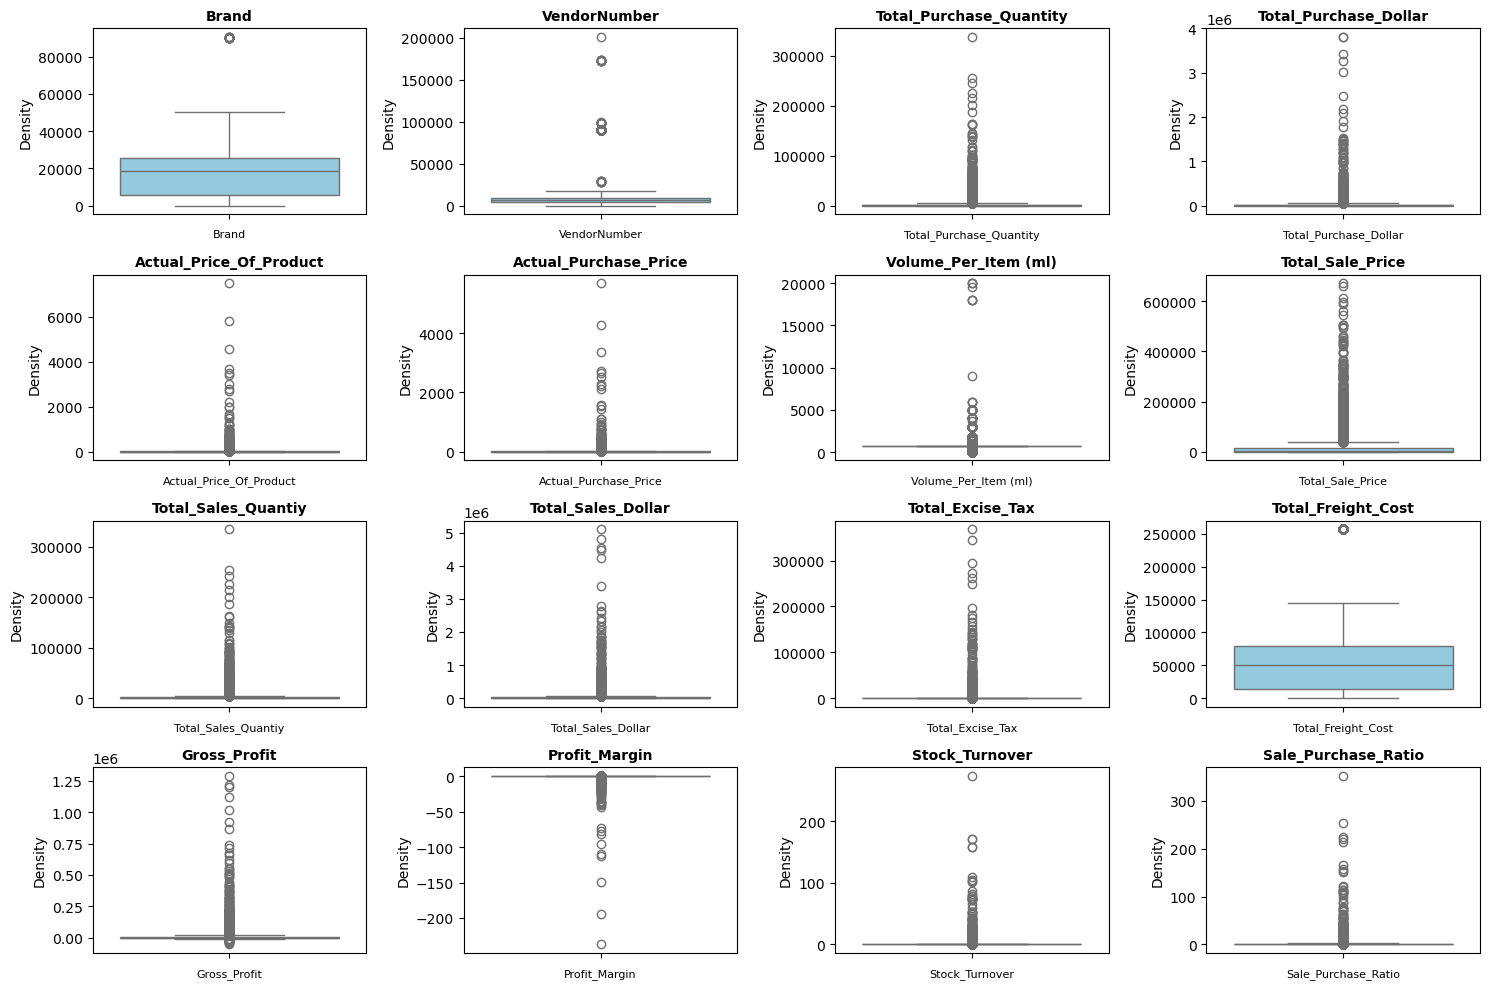

In [9]:
Num_Columns = Vendor_Sale_Summary.select_dtypes(include=['int64','float64']).columns
Col = 4
N_Col = len(Num_Columns)
Rows = math.ceil(N_Col/Col)

fig ,axes = plt.subplots(Rows, Col, figsize = (15,10))

axes = axes.flatten()

for i,features in enumerate(Num_Columns):
    sns.boxplot(
        data=Vendor_Sale_Summary,
        y = features,
        ax = axes[i],
        color = 'skyblue'
        )
    axes[i].set_title(features,fontsize = 10,fontweight='bold')
    axes[i].set_xlabel(features,fontsize=8)
    axes[i].set_ylabel('Density')
    # axes[i].spines['right'].set_visible(False)
    # axes[i].spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

In [10]:
Vendor_Sale_Summary = Vendor_Sale_Summary[
    (Vendor_Sale_Summary['Gross_Profit'] > 0) & 
    (Vendor_Sale_Summary['Profit_Margin'] > 0) & 
    (Vendor_Sale_Summary['Total_Sales_Quantiy'] > 0)
]


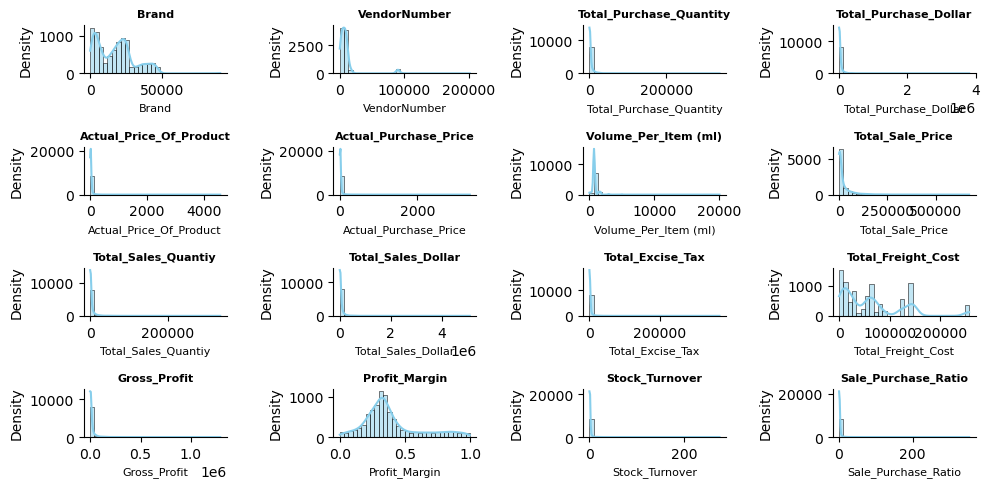

In [11]:
Num_Columns = Vendor_Sale_Summary.select_dtypes(include=['int64','float64']).columns
Col = 4
N_Col = len(Num_Columns)
Rows = math.ceil(N_Col/Col)

fig ,axes = plt.subplots(Rows, Col, figsize = (10,5))

axes = axes.flatten()

for i,features in enumerate(Num_Columns):
    sns.histplot(
        data=Vendor_Sale_Summary,
        x=features,
        ax = axes[i],
        bins=30,
        color='skyblue',
        kde=True
        )
    axes[i].set_title(features,fontsize = 8,fontweight='bold')
    axes[i].set_xlabel(features,fontsize=8)
    axes[i].set_ylabel('Density')
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

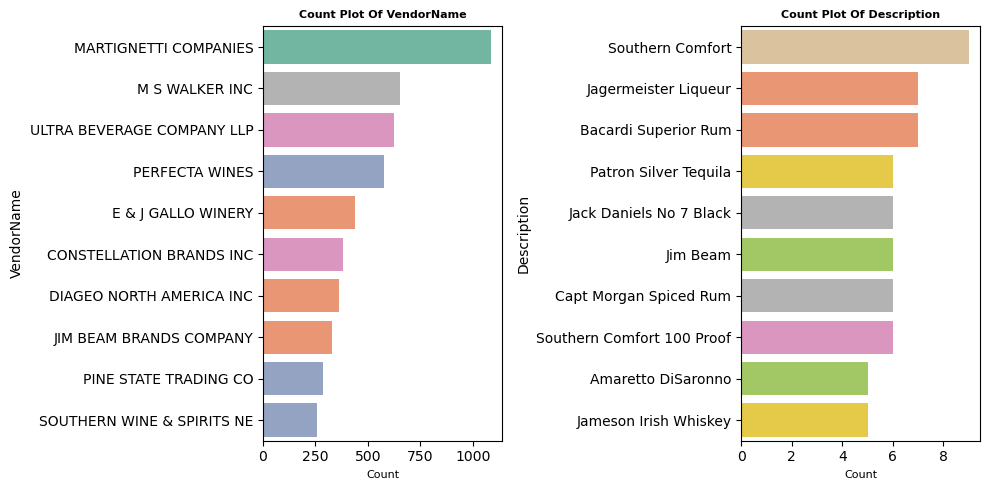

In [12]:
fig ,axes = plt.subplots(1, 2, figsize = (10,5))

Cat_Col = ['VendorName','Description']

axes = axes.flatten()

for i,Col in enumerate(Cat_Col):
    sns.countplot(
        data=Vendor_Sale_Summary,
        y=Col,
        ax = axes[i],
        order = Vendor_Sale_Summary[Col].value_counts().index[:10], # Top 10 Vendors And Brand
        palette='Set2',
        hue = Col
        )
    axes[i].set_title(f'Count Plot Of {Col}',fontsize = 8,fontweight='bold')
    axes[i].set_xlabel('Count',fontsize=8)
    axes[i].set_ylabel(Col,fontsize = 10)
    # axes[i].spines['right'].set_visible(False)
    # axes[i].spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

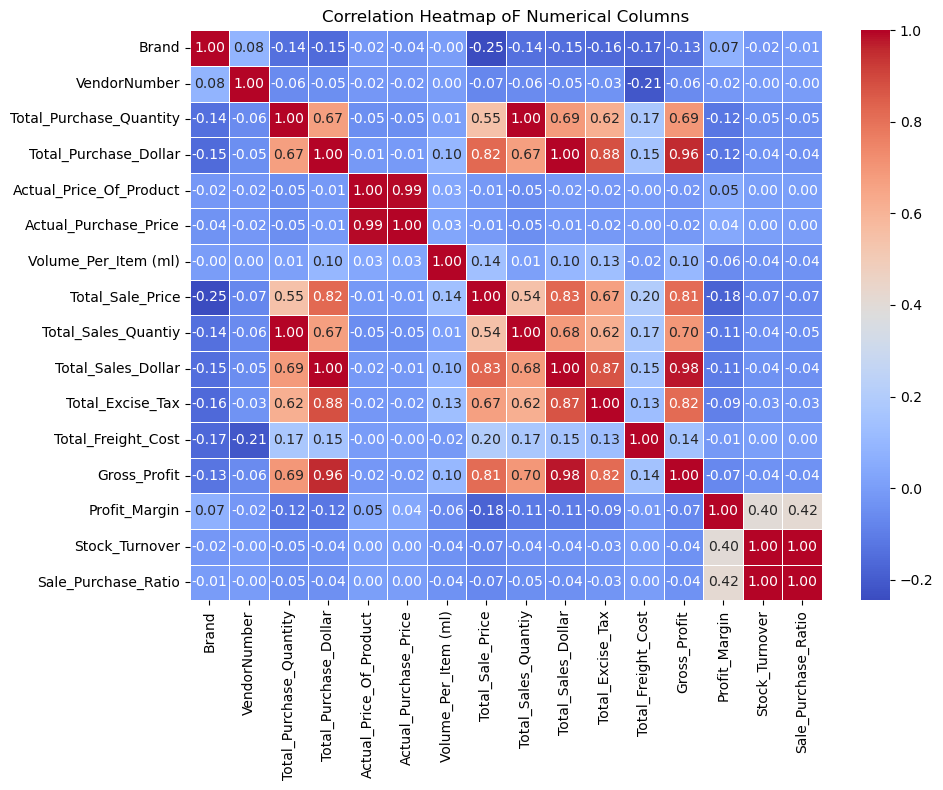

In [13]:
# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(
    Vendor_Sale_Summary[Num_Columns].corr(),
    annot=True,          # show numbers
    cmap='coolwarm',     # color style
    fmt='.2f',           # decimal format
    linewidths=0.5
)

plt.title("Correlation Heatmap oF Numerical Columns")
plt.tight_layout()
plt.show()

***Data Analysis***

Indentify The Brands That Needs Promotional And Price Adjustment Which Exihibits Lower Sale Performance And Higher Profit Margin

In [14]:
Brand_Summary = Vendor_Sale_Summary.groupby('Description').agg(
    Total_Sales_Dollar = ("Total_Sales_Dollar", "sum"),
    Avg_Profit_Margin = ("Profit_Margin", "mean"),
).reset_index()
Brand_Summary.head(10)

,Description,Total_Sales_Dollar,Avg_Profit_Margin
0,(RI) 1,21519.090954,0.180607
1,.nparalleled Svgn Blanc,1094.629976,0.299782
2,10 Span Cab Svgn CC,2703.889938,0.209376
3,10 Span Chard CC,3325.559910,0.278064
4,10 Span Pnt Gris Monterey Cy,2082.219936,0.322262
5,10 Span Pnt Nr CC,2441.739927,0.258361
6,12 Days of Pearls Gift Set,309.689993,0.976783
7,13 Celsius Svgn Bl,34041.229755,0.576700
8,13th Colony Sthrn Corn Whsky,359.820005,0.424462
9,14 Hands Cab Svgn Wash,273570.437840,0.382275


In [15]:
Sale_Threshold = Brand_Summary['Total_Sales_Dollar'].quantile(0.25)
Profit_Margin_Threshold = Brand_Summary['Avg_Profit_Margin'].quantile(0.75)
print(Sale_Threshold,Profit_Margin_Threshold)

1331.6949867010117 0.453350608257417


In [16]:
Low_Sale_High_Profit = Brand_Summary[
    (Brand_Summary['Total_Sales_Dollar'] <= Sale_Threshold) &
    (Brand_Summary['Avg_Profit_Margin'] >= Profit_Margin_Threshold)
]

Low_Sale_High_Profit.sort_values(
    by = 'Avg_Profit_Margin',
    ascending = False 
).head(10)


,Description,Total_Sales_Dollar,Avg_Profit_Margin
4568,M Chiarlo Gavi Wh,1208.899984,0.993937
6957,The Club Strawbry Margarita,143.280000,0.989740
2462,Dom Janasse Terre d'Argile,1019.489990,0.986837
1445,Cecchi Natio Organic Chianti,735.079981,0.985797
6438,Skinnygirl Cucumber Vodka,779.480011,0.985644
528,Barbarossa Spiced Rum,945.140005,0.982246
452,Bacardi Oakheart Spiced Trav,399.599991,0.981331
1873,Chi Chi's Chocolate Malt RTD,461.579990,0.981108
4095,Kesselstatt Piesporter Gold,929.689987,0.978057
5461,Penfolds B28 Shiraz/Kalimna,890.730045,0.977850


In [17]:
Brand_Summary = Brand_Summary[
    Brand_Summary['Total_Sales_Dollar'] < 7000
]

# For Better Visualization

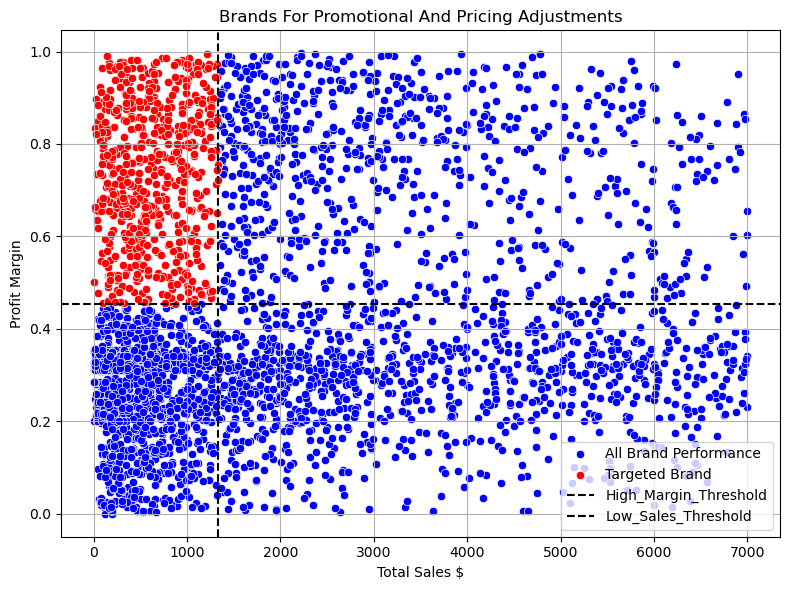

In [18]:
plt.figure(figsize=(8,6))

sns.scatterplot(data=Brand_Summary, x='Total_Sales_Dollar' , y='Avg_Profit_Margin', color = 'blue', label = 'All Brand Performance')
sns.scatterplot(data=Low_Sale_High_Profit, x='Total_Sales_Dollar' , y='Avg_Profit_Margin', color = 'red', label = 'Targeted Brand')

plt.axhline(Profit_Margin_Threshold, linestyle = '--', color = 'black', label = 'High_Margin_Threshold' )
plt.axvline(Sale_Threshold, linestyle = '--', color = 'black', label = 'Low_Sales_Threshold' )

plt.title('Brands For Promotional And Pricing Adjustments')
plt.xlabel('Total Sales $')
plt.ylabel('Profit Margin')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Which Vendor And Brands Demonstrate The Highest Sale Performance

In [19]:
# Function To Change Dollar Values Into K
def Convert_Dollar_Into_Vales(Values):
    if Values >= 1_000_000:
        return f"{Values / 1_000_000:.2f}M"
    elif Values >= 1_000:
        return f'{Values / 1_000:.2f}k'
    else:
        return str(Values)

In [20]:
# Top Vendor And Brands By Sale Performance
Top_10_Vendors = Vendor_Sale_Summary.groupby('VendorName')['Total_Sales_Dollar'].sum().nlargest(10)
Top_10_Brands = Vendor_Sale_Summary.groupby('Description')['Total_Sales_Dollar'].sum().nlargest(10)

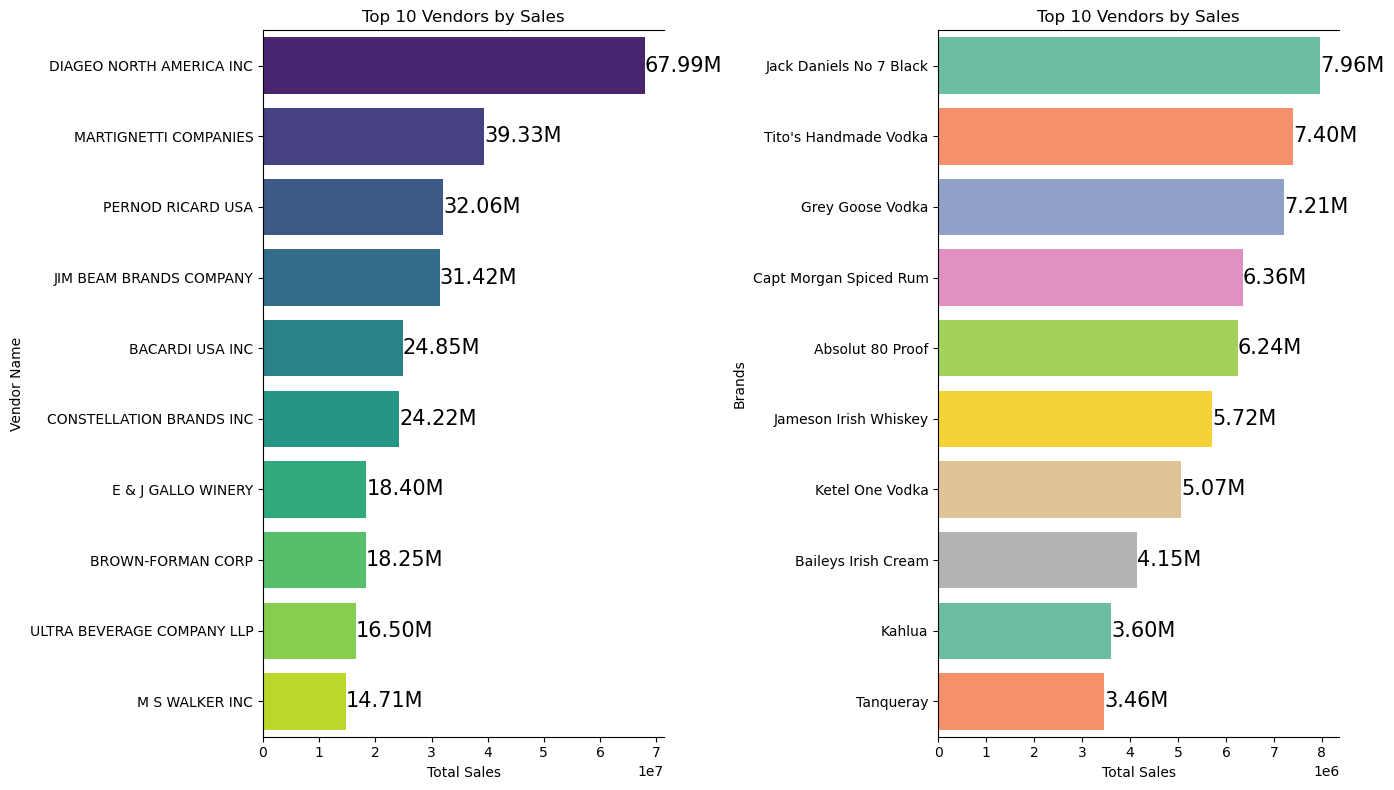

In [21]:
plt.figure(figsize=(14,8))

# --- Left subplot ---
plt.subplot(1,2,1)
ax1 = sns.barplot(
    x = Top_10_Vendors.values,
    y = Top_10_Vendors.index,
    hue = Top_10_Vendors.index,
    palette='viridis',
    saturation = 0.9
)

for i, value in enumerate(Top_10_Vendors.values):
    ax1.text(value, i, Convert_Dollar_Into_Vales(value), va = "center", ha = "left", fontsize = 15)

ax1.set_title('Top 10 Vendors by Sales')
ax1.set_xlabel('Total Sales')
ax1.set_ylabel('Vendor Name')
ax1.spines['right'].set_visible(False)

# --- Right subplot ---
plt.subplot(1,2,2)
ax1 = sns.barplot(
    x = Top_10_Brands.values,
    y = Top_10_Brands.index,
    hue = Top_10_Brands.index,
    palette='Set2',
    saturation = 0.9
)

for i, value in enumerate(Top_10_Brands.values):
    ax1.text(value, i, Convert_Dollar_Into_Vales(value), va = "center", ha = "left", fontsize = 15)

ax1.set_title('Top 10 Vendors by Sales')
ax1.set_xlabel('Total Sales')
ax1.set_ylabel('Brands')
ax1.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

Which Vendor Contribute The Most To Purchase Dollars

In [22]:
# ---------------------------------------------------------
# STEP 1: Vendor-level aggregation
# ---------------------------------------------------------
# Group data by VendorName and calculate total Purchase,
# total Sales, and total Gross Profit for each vendor

Vendor_Performance_On_Purchase_Dollar = (
    Vendor_Sale_Summary
    .groupby('VendorName')
    .agg({
        'Total_Purchase_Dollar': 'sum',
        'Total_Sales_Dollar': 'sum',
        'Gross_Profit': 'sum'
    })
    .reset_index()
)

# ---------------------------------------------------------
# STEP 2: Calculate Purchase Contribution (%)
# ---------------------------------------------------------
# This shows how much each vendor contributes to
# total purchase dollars (in percentage terms)

Vendor_Performance_On_Purchase_Dollar['Purchase_Contribution(%)'] = (
    Vendor_Performance_On_Purchase_Dollar['Total_Purchase_Dollar']
    / Vendor_Performance_On_Purchase_Dollar['Total_Purchase_Dollar'].sum()
) * 100

# ---------------------------------------------------------
# STEP 3: Convert large dollar values into readable format
# (e.g., 1,200,000 → 1.2M)
# ---------------------------------------------------------

Vendor_Performance_On_Purchase_Dollar['Total_Purchase_Dollar'] = (
    Vendor_Performance_On_Purchase_Dollar['Total_Purchase_Dollar']
    .apply(lambda x: Convert_Dollar_Into_Vales(x))
)

Vendor_Performance_On_Purchase_Dollar['Total_Sales_Dollar'] = (
    Vendor_Performance_On_Purchase_Dollar['Total_Sales_Dollar']
    .apply(lambda x: Convert_Dollar_Into_Vales(x))
)

Vendor_Performance_On_Purchase_Dollar['Gross_Profit'] = (
    Vendor_Performance_On_Purchase_Dollar['Gross_Profit']
    .apply(lambda x: Convert_Dollar_Into_Vales(x))
)

# ---------------------------------------------------------
# STEP 4: Select Top 10 Vendors by Purchase Contribution
# ---------------------------------------------------------
# This helps focus analysis on the most impactful vendors
# and improves visualization clarity

Vendor_Performance_On_Purchase_Dollar = (
    Vendor_Performance_On_Purchase_Dollar
    .nlargest(10, 'Purchase_Contribution(%)')
    .round(2)
)

# ---------------------------------------------------------
# STEP 5: Calculate Cumulative Purchase Contribution (%)
# ---------------------------------------------------------
# This is used for Pareto analysis (80/20 rule)
# Shows how top vendors cumulatively contribute to purchases

Vendor_Performance_On_Purchase_Dollar['Cumulative_Contribution'] = (
    Vendor_Performance_On_Purchase_Dollar['Purchase_Contribution(%)']
    .cumsum()
)

# ---------------------------------------------------------
# Final Output: Vendor Purchase Performance Summary
# ---------------------------------------------------------

Vendor_Performance_On_Purchase_Dollar


,VendorName,Total_Purchase_Dollar,Total_Sales_Dollar,Gross_Profit,Purchase_Contribution(%),Cumulative_Contribution
25,DIAGEO NORTH AMERICA INC,50.10M,67.99M,17.89M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,39.33M,13.83M,8.30,24.60
68,PERNOD RICARD USA,23.85M,32.06M,8.21M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,31.42M,7.93M,7.64,40.00
6,BACARDI USA INC,17.43M,24.85M,7.42M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,24.22M,8.95M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,18.25M,5.01M,4.31,54.95
30,E & J GALLO WINERY,12.07M,18.40M,6.33M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,16.50M,5.34M,3.63,62.51
53,M S WALKER INC,9.76M,14.71M,4.94M,3.18,65.69


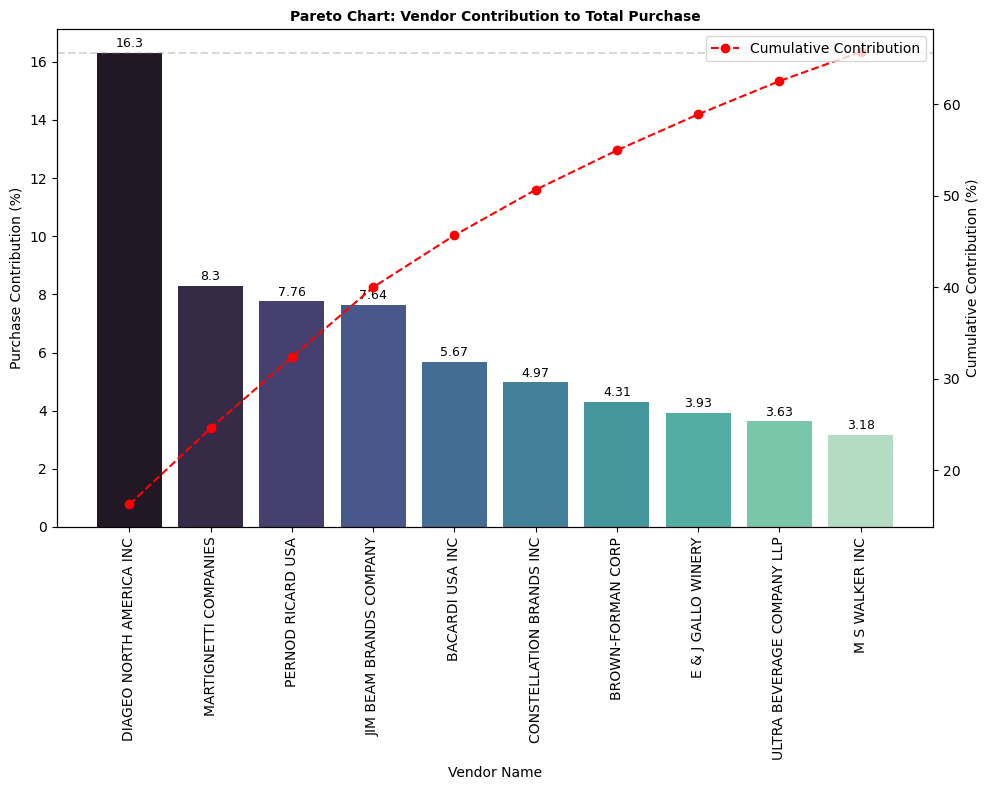

In [23]:
# Figure setup
plt.figure(figsize=(10, 8))
ax1 = plt.subplot(1, 1, 1)

# -------------------------------------------------
# Bar plot: Individual vendor purchase contribution
# -------------------------------------------------
sns.barplot(
    data=Vendor_Performance_On_Purchase_Dollar,
    x='VendorName',
    y='Purchase_Contribution(%)',
    hue = 'VendorName',
    palette='mako',
    ax=ax1
)

# Add value labels on bars
for i, value in enumerate(Vendor_Performance_On_Purchase_Dollar['Purchase_Contribution(%)']):
    ax1.text(i, value + 0.2, value, ha='center', fontsize=9)

# -------------------------------------------------
# Line plot: Cumulative contribution (secondary axis)
# -------------------------------------------------
ax2 = ax1.twinx()
ax2.plot(
    Vendor_Performance_On_Purchase_Dollar['VendorName'],
    Vendor_Performance_On_Purchase_Dollar['Cumulative_Contribution'],
    color='red',
    marker='o',
    linestyle='dashed',
    label='Cumulative Contribution'
)

# -------------------------------------------------
# Chart styling
# -------------------------------------------------
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchase',
              fontsize=10, fontweight='bold')

ax1.set_xlabel('Vendor Name')
ax1.set_ylabel('Purchase Contribution (%)')
ax2.set_ylabel('Cumulative Contribution (%)')

# Rotate vendor names for readability
ax1.tick_params(axis='x', rotation=90)

# Reference line (example threshold)
ax1.axhline(y=16.3, color='gray', linestyle='dashed', alpha=0.3)

# Legend
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


How Much Of Total Procurement Is Dependent On Top Vendors?

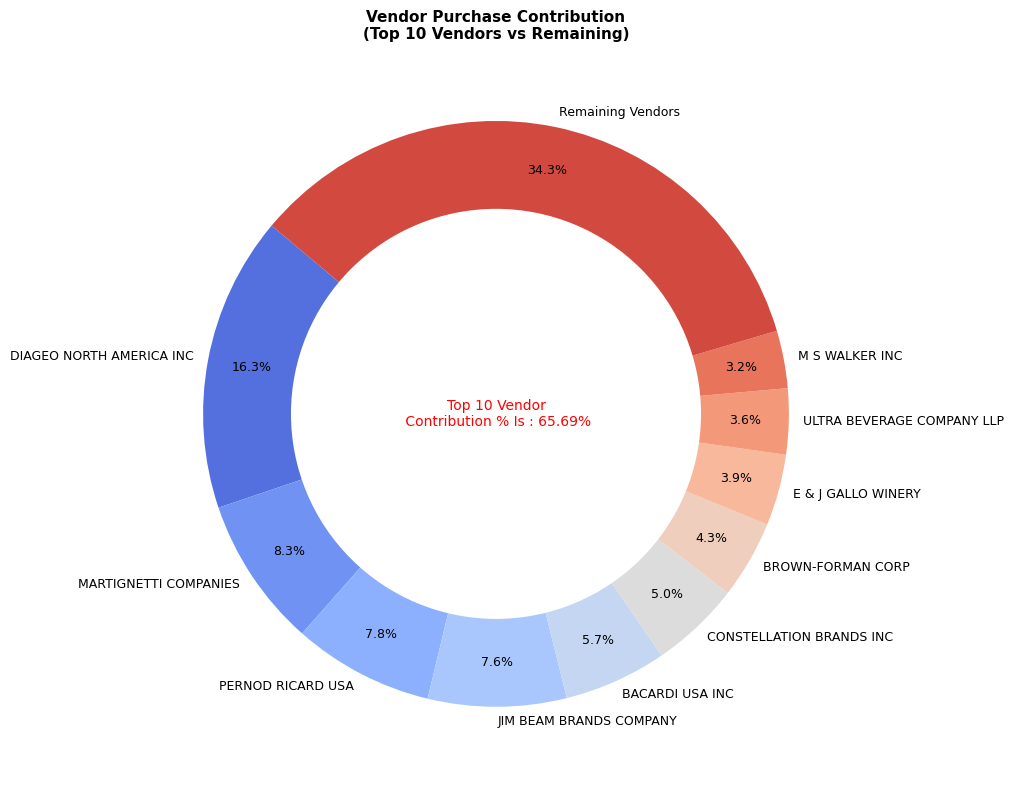

In [24]:
# -------------------------------------------------
# STEP 1: Prepare data
# -------------------------------------------------

# Calculate remaining contribution
remaining_value = (
    100 - Vendor_Performance_On_Purchase_Dollar['Purchase_Contribution(%)'].sum()
)

# Values & labels for donut
values = list(Vendor_Performance_On_Purchase_Dollar['Purchase_Contribution(%)']) + [remaining_value]
labels = list(Vendor_Performance_On_Purchase_Dollar['VendorName']) + ['Remaining Vendors']

# -------------------------------------------------
# STEP 2: Colors using seaborn palette
# -------------------------------------------------
colors = sns.color_palette("coolwarm", len(values))

# -------------------------------------------------
# STEP 3: Draw donut chart
# -------------------------------------------------
plt.figure(figsize=(10, 8))

wedges, texts, autotexts = plt.pie(
    values,
    labels=labels,
    colors=colors,
    startangle=140,
    autopct='%1.1f%%',      # 👈 VALUES INSIDE
    pctdistance=0.85,       # 👈 position inside slice
    labeldistance=1.05,
    textprops={'fontsize': 9, 'color': 'black'}
)

# Create donut hole
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

# -------------------------------------------------
# STEP 4: Title & annotation
# -------------------------------------------------
plt.title(
    "Vendor Purchase Contribution\n(Top 10 Vendors vs Remaining)",
    fontsize=11,
    fontweight='bold'
)

# Center text (optional but professional)
plt.text(0, 0, f'Top 10 Vendor\n Contribution % Is : {round(Vendor_Performance_On_Purchase_Dollar['Purchase_Contribution(%)'].sum(),2)}%', ha='center', va='center', fontsize=10, color = 'red')

plt.tight_layout()
plt.show()


Does Purchasing In Bulk The Unit Price, And What Is The Optimal Purchase Volume For Cost Saving?

In [72]:
# -------------------------------------------------
# Step 1: Calculate Unit Purchase Price
# -------------------------------------------------
# Unit_Purchase_Price = Total Purchase Dollar / Total Purchase Quantity
# This tells us how much one unit costs on average from each vendor
Vendor_Sale_Summary['Unit_Purchase_Price'] = (
    Vendor_Sale_Summary['Total_Purchase_Dollar'] /
    Vendor_Sale_Summary['Total_Purchase_Quantity']
)

# -------------------------------------------------
# Step 2: Categorize vendors by Order Size (Quantity-based)
# -------------------------------------------------
# qcut divides Total_Purchase_Quantity into 3 equal-sized groups (quantiles)
# Small Orders   -> Low purchase quantity
# Medium Orders  -> Medium purchase quantity
# Large Orders   -> High / bulk purchase quantity
Vendor_Sale_Summary['Order_Size'] = pd.qcut(
    Vendor_Sale_Summary['Total_Purchase_Quantity'],
    q=3,
    labels=['Small Orders', 'Medium Orders', 'Large Orders']
)

# -------------------------------------------------
# Step 3: Analyze average unit price by Order Size
# -------------------------------------------------
# observed=True ensures only categories present in data are considered
# This helps us understand whether bulk purchasing reduces unit cost
avg_unit_price_by_order_size = (
    Vendor_Sale_Summary
    .groupby('Order_Size', observed=True)['Unit_Purchase_Price']
    .mean()
)

avg_unit_price_by_order_size


Order_Size
Small Orders     39.057543
Medium Orders    15.486414
Large Orders     10.777625
Name: Unit_Purchase_Price, dtype: float64

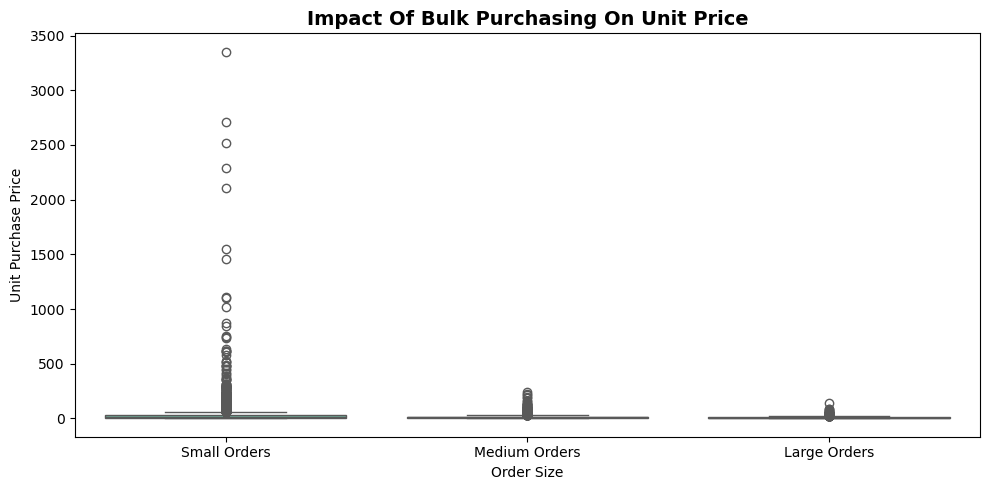

In [26]:
plt.figure(figsize=(10, 5))

sns.boxplot(
    data = Vendor_Sale_Summary,
    x = 'Order_Size',
    y = 'Unit_Purchase_Price',
    hue = 'Order_Size',
    palette = 'Set2'
)

plt.title('Impact Of Bulk Purchasing On Unit Price', fontsize=14, fontweight='bold')
plt.xlabel("Order Size")
plt.ylabel("Unit Purchase Price")
plt.tight_layout()
plt.show()

Which Vendor Has Low Inventory Turnover. Indicating Excess Stock And Slow-Moving Products?

In [27]:
Vendor_Sale_Summary[Vendor_Sale_Summary['Stock_Turnover'] < 1].groupby('VendorName')[['Stock_Turnover']].mean().sort_values('Stock_Turnover', ascending = True).head(10)

,Stock_Turnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


How Much Capital Is Locked In Unsold Inventory Per Vendor, And Which Vendor Contribute More To It?

In [42]:
Vendor_Sale_Summary['Unsold_Inventory_Value'] = (Vendor_Sale_Summary['Total_Purchase_Quantity'] - Vendor_Sale_Summary['Total_Sales_Quantiy']) * Vendor_Sale_Summary['Actual_Purchase_Price']

print("Total Unsold Inventory Capital:- ",Convert_Dollar_Into_Vales(Vendor_Sale_Summary['Unsold_Inventory_Value'].sum()))

Total Unsold Inventory Capital:-  2.71M


In [53]:
Inventory_Value_Per_Vendor = Vendor_Sale_Summary.groupby('VendorName')['Unsold_Inventory_Value'].sum().reset_index()

Inventory_Value_Per_Vendor = Inventory_Value_Per_Vendor.sort_values('Unsold_Inventory_Value',ascending=False).head(10)
Inventory_Value_Per_Vendor['Unsold_Inventory_Value'] = Inventory_Value_Per_Vendor['Unsold_Inventory_Value'].apply(lambda x: Convert_Dollar_Into_Vales(x))

,VendorName,Unsold_Inventory_Value
25,DIAGEO NORTH AMERICA INC,722.21k
46,JIM BEAM BRANDS COMPANY,554.67k
68,PERNOD RICARD USA,470.63k
116,WILLIAM GRANT & SONS INC,401.96k
30,E & J GALLO WINERY,228.28k
79,SAZERAC CO INC,198.44k
11,BROWN-FORMAN CORP,177.73k
20,CONSTELLATION BRANDS INC,133.62k
61,MOET HENNESSY USA INC,126.48k
77,REMY COINTREAU USA INC,118.60k


What Is The 95% Confidence Interval For Profit Margin Of Top Performing And Low Performing Vendors ?

In [60]:
Top_Vendor_Thresold = Vendor_Sale_Summary['Total_Sales_Dollar'].quantile(0.75)
Low_Vendor_Thresold = Vendor_Sale_Summary['Total_Sales_Dollar'].quantile(0.25)

Top_Vendors = Vendor_Sale_Summary[Vendor_Sale_Summary['Total_Sales_Dollar'] >= Top_Vendor_Thresold]['Profit_Margin'].dropna()
Low_Vendors = Vendor_Sale_Summary[Vendor_Sale_Summary['Total_Sales_Dollar'] <= Low_Vendor_Thresold]['Profit_Margin'].dropna()

In [64]:
from scipy import stats

def confidence_interval(data, confidence=0.95):
    data = np.array(data)
    n = len(data)
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    t = stats.t.ppf(1 - (1 - confidence)/2, n - 1)
    margin = t * std / np.sqrt(n)
    return mean, mean - margin, mean + margin

In [69]:
Top_Mean, Top_Lower, Top_Upper = confidence_interval(Top_Vendors)
Low_Mean, Low_Lower, Low_Upper = confidence_interval(Low_Vendors)

print(f"95% Confidence Interval Of Top Vendors: ({Top_Lower:.2f}, {Top_Upper:.2f}), Mean: {Top_Mean:.2f}")
print(f"95% Confidence Interval Of Low Vendors: ({Low_Lower:.2f}, {Low_Upper:.2f}), Mean: {Low_Mean:.2f}")

95% Confidence Interval Of Top Vendors: (0.31, 0.32), Mean: 0.31
95% Confidence Interval Of Low Vendors: (0.40, 0.43), Mean: 0.42


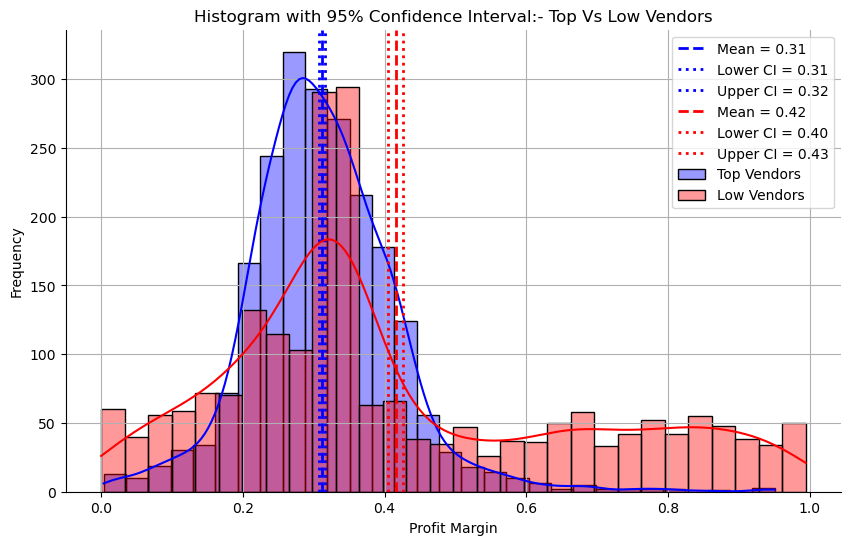

In [70]:
plt.figure(figsize=(10,6))

sns.histplot(Top_Vendors, kde=True, color='blue', bins=30,  label='Top Vendors', alpha=0.4)
plt.axvline(Top_Mean, color='blue', linestyle='--', linewidth=2, label=f'Mean = {Top_Mean:.2f}')
plt.axvline(Top_Lower, color='blue', linestyle=':', linewidth=2, label=f'Lower CI = {Top_Lower:.2f}')
plt.axvline(Top_Upper, color='blue', linestyle=':', linewidth=2, label=f'Upper CI = {Top_Upper:.2f}')

sns.histplot(Low_Vendors, kde=True, color='red', bins=30, label='Low Vendors', alpha=0.4)
plt.axvline(Low_Mean, color='red', linestyle='--', linewidth=2, label=f'Mean = {Low_Mean:.2f}')
plt.axvline(Low_Lower, color='red', linestyle=':', linewidth=2, label=f'Lower CI = {Low_Lower:.2f}')
plt.axvline(Low_Upper, color='red', linestyle=':', linewidth=2, label=f'Upper CI = {Low_Upper:.2f}')

plt.title("Histogram with 95% Confidence Interval:- Top Vs Low Vendors")
plt.xlabel("Profit Margin")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
sns.despine()
plt.show()

In [71]:
t_stat, p_value = stats.ttest_ind(Top_Vendors, Low_Vendors, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Decision
alpha = 0.05
if p_value < alpha:
    print("✅ Reject Null Hypothesis: Significant difference between Top and Low Vendors")
else:
    print("❌ Fail to Reject Null Hypothesis: No significant difference")

T-statistic: -17.6440
P-value: 0.0000
✅ Reject Null Hypothesis: Significant difference between Top and Low Vendors


In [73]:
Vendor_Sale_Summary

,Brand,Description,VendorName,VendorNumber,Total_Purchase_Quantity,Total_Purchase_Dollar,Actual_Price_Of_Product,Actual_Purchase_Price,Volume_Per_Item (ml),Total_Sale_Price,...,Total_Sales_Dollar,Total_Excise_Tax,Total_Freight_Cost,Gross_Profit,Profit_Margin,Stock_Turnover,Sale_Purchase_Ratio,Unit_Purchase_Price,Order_Size,Unsold_Inventory_Value
0,3265,Firefly Sweet Tea Vodka,SAZERAC CO INC,8004,48651,17514.360038,0.49,0.36,50.0,1247.540024,...,23838.010077,2552.479987,50293.619843,6323.650039,0.265276,0.999959,1.361055,0.360000,Large Orders,0.72
1,5708,Dr McGillicuddy's Root Beer,SAZERAC CO INC,8004,66026,25089.879722,0.49,0.38,50.0,11536.470111,...,59473.259847,3141.109961,50293.619843,34383.380125,0.578132,0.909854,2.370408,0.380000,Large Orders,2261.76
2,5683,Dr McGillicuddy's Apple Pie,SAZERAC CO INC,8004,6,2.340000,0.49,0.39,50.0,1.470000,...,65.659999,7.040000,50293.619843,63.319999,0.964362,22.333333,28.059830,0.390000,Small Orders,-49.92
3,5877,Ryans Irish Cream,SAZERAC CO INC,8004,36149,22412.380321,0.99,0.62,50.0,10284.120099,...,37560.599988,1976.349978,50293.619843,15148.219666,0.403301,1.049545,1.675886,0.620000,Large Orders,-1110.42
4,6432,Shady Fruit Real Ruby Red Gr,DIAGEO NORTH AMERICA INC,3960,4679,2994.560059,0.99,0.64,50.0,2131.470021,...,7928.909990,63.069999,257032.069523,4934.349930,0.622324,1.711691,2.647771,0.640000,Large Orders,-2131.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10683,4109,Hennessy Paradis Imperial,MOET HENNESSY USA INC,8112,2,4218.740234,2699.99,2109.37,750.0,8099.969971,...,8099.969971,2.370000,48347.260061,3881.229736,0.479166,1.500000,1.919997,2109.370117,Small Orders,-2109.37
10685,500,Remy Martin Louis XIII,REMY COINTREAU USA INC,7239,31,70992.172119,2999.99,2290.07,750.0,72999.759766,...,85049.719727,22.100001,16978.669976,14057.547607,0.165286,0.903226,1.198015,2290.070068,Small Orders,6870.21
10686,5795,Courvoisier L'Essence Cognac,JIM BEAM BRANDS COMPANY,12546,1,2518.510010,3399.99,2518.51,750.0,3399.989990,...,3399.989990,0.790000,123880.969891,881.479980,0.259260,1.000000,1.350001,2518.510010,Small Orders,0.00
10688,8385,Glenfiddich 1978 Rare Collct,WILLIAM GRANT & SONS INC,3664,1,2713.169922,3499.99,2713.17,750.0,3499.989990,...,3499.989990,0.790000,30234.420094,786.820068,0.224806,1.000000,1.290000,2713.169922,Small Orders,0.00
